In [1]:
import sys
sys.path.append("/home/bl9/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

#import geobayes_simple as gs
from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

import copy

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

from gempy import Topology

import vtk

In [87]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = "/home/bl9/gempy//input_data/FabLessPoints_Foliations.csv",
                         path_i = "/home/bl9/gempy//input_data/FabLessPoints_Points.csv")
geo_data.n_faults = 1

In [88]:
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Reservoir', 'Seal', 'NonReservoirDeep','SecondaryReservoir')},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [90]:
geo_data.set_formation_number(['MainFault', 'SecondaryReservoir', 'Seal', 
                               'Reservoir','NonReservoirDeep'])

In [18]:
#gp.data_to_pickle(geo_data, 'BasicFault') #saving data to pickle

In [19]:
# DO I NEED THIS?? i think not

# stdev for x,y,z interface coordinates
#geo_data.interfaces['X_std'] = None
#geo_data.interfaces['Y_std'] = None
#geo_data.interfaces['Z_std'] = None
#geo_data.interfaces['dist_type'] = "Normal" # should be initially None
#geo_data.interfaces['X_dist'] = None
#geo_data.interfaces['Y_dist'] = None
#geo_data.interfaces['Z_dist'] = None

In [20]:
geo_data.interfaces.head()

X       Y       Z  formation series  order_series  formation number  \
0  1000.0  1000.0 -1000.0  MainFault  fault             1                 1   
1   800.0  1000.0 -1600.0  MainFault  fault             1                 1   
2  1200.0  1000.0  -400.0  MainFault  fault             1                 1   
3  1100.0  1000.0  -700.0  MainFault  fault             1                 1   
4   900.0  1000.0 -1300.0  MainFault  fault             1                 1   

                        annotations  isFault X_std Y_std Z_std dist_type  \
0  ${\bf{x}}_{\alpha \,{\bf{4}},0}$     True  None  None  None    Normal   
1  ${\bf{x}}_{\alpha \,{\bf{4}},4}$     True  None  None  None    Normal   
2  ${\bf{x}}_{\alpha \,{\bf{4}},3}$     True  None  None  None    Normal   
3  ${\bf{x}}_{\alpha \,{\bf{4}},2}$     True  None  None  None    Normal   
4  ${\bf{x}}_{\alpha \,{\bf{4}},1}$     True  None  None  None    Normal   

  X_dist Y_dist Z_dist  
0   None   None   None  
1   None   None   None  
2   None   None   None  
3   None   None   None  
4   None   None   None

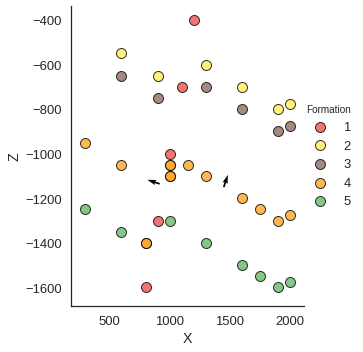

In [92]:
gp.plot_data(geo_data)

In [77]:
gp.plot_data_3D(geo_data)

917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0


In [10]:
# INTERPOLATION
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

In [11]:
# COMPUTATION OF THE MODEL
sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
sol.shape

(1, 3, 125000)

In [12]:
#DO I NEED THIS HERE? i think not
#lith = sol[0, 0,:]
#fault = sol[0, 2,:]

In [13]:
# CREATING SURFACES FOR LAYERS
res_surf, res_surf_simp = gp.get_surfaces(potential_block=sol[0,1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']))
nonresdeep_surf, nonresdeep_surf_simp = gp.get_surfaces(potential_block=sol[0,1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['NonReservoirDeep']))
sec_res_surf, sec_res_surf_simp = gp.get_surfaces(potential_block=sol[0,1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['SecondaryReservoir']))
seal_surf, seal_surf_simp = gp.get_surfaces(potential_block=sol[0,1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Seal']))

In [18]:
#geo_data.get_formation_number().keys()

dict_keys(['SecondaryReservoir', 'MainFault', 'NonReservoirDeep', 'DefaultBasement', 'Seal', 'Reservoir'])

In [19]:
#geo_data.get_formations()

array(['MainFault', 'NonReservoirDeep', 'Reservoir', 'SecondaryReservoir',
       'Seal'], dtype=object)

In [91]:
geo_data.get_formation_number() #?????

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 5,
 'Reservoir': 4,
 'Seal': 3,
 'SecondaryReservoir': 2}

In [13]:
gp.plot_surfaces_3D(geo_data, [sec_res_surf, seal_surf, res_surf, nonresdeep_surf], 
                    [sec_res_surf_simp, seal_surf_simp, res_surf_simp, nonresdeep_surf_simp], 
                    ["SecondaryReservoir", "Seal", 'Reservoir', "NonReservoirDeep"], [1,2,3,4])

917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0


In [46]:
gp.plot_surfaces_3D(geo_data, [res_surf], 
                    [res_surf_simp], 
                    ['Reservoir'], [3])

917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
917.45 1000.0 -1135.398
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0
1450.0 1000.0 -1150.0


In [193]:
np.set_printoptions(threshold=np.nan)
#(position res_surf[1,:])
#print(res_sorted)
#sol[0,:].reshape(50,50,50)

In [11]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 5,
 'Reservoir': 4,
 'Seal': 3,
 'SecondaryReservoir': 2}

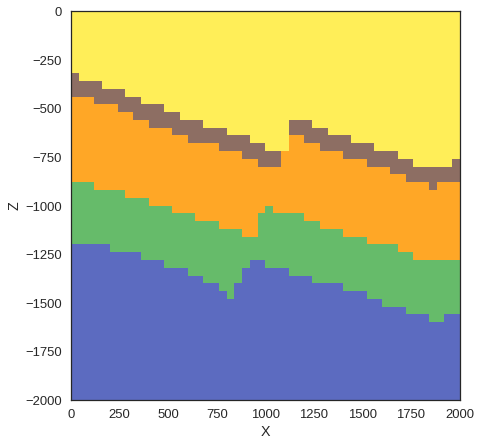

In [14]:
#%matplotlib notebook
%matplotlib inline
gp.plot_section(geo_data, sol[0,0,:], 25) #plot_data=True)

In [23]:
interp_data.geo_data_res.n_faults

1

In [24]:
interp_data.geo_data_res.interfaces

X         Y         Z           formation series  order_series  \
0   0.461638    0.5001    0.5001           MainFault  fault             1   
1   0.410356    0.5001  0.346254           MainFault  fault             1   
2   0.512921    0.5001  0.653946           MainFault  fault             1   
3   0.487279    0.5001  0.577023           MainFault  fault             1   
4   0.435997    0.5001  0.423177           MainFault  fault             1   
5   0.718049    0.5001  0.557792  SecondaryReservoir   Rest             2   
6   0.615485    0.5001  0.577023  SecondaryReservoir   Rest             2   
7   0.692408    0.5001  0.551382  SecondaryReservoir   Rest             2   
8   0.435997    0.5001  0.589844  SecondaryReservoir   Rest             2   
9   0.359074    0.5001  0.615485  SecondaryReservoir   Rest             2   
10  0.538562    0.5001  0.602664  SecondaryReservoir   Rest             2   
11  0.435997    0.5001  0.564203                Seal   Rest             2   
12  0.692408    0.5001  0.525741                Seal   Rest             2   
13  0.718049    0.5001  0.532151                Seal   Rest             2   
14  0.359074    0.5001  0.589844                Seal   Rest             2   
15  0.538562    0.5001  0.577023                Seal   Rest             2   
16  0.615485    0.5001  0.551382                Seal   Rest             2   
17  0.410356  0.294972  0.397536           Reservoir   Rest             2   
18  0.410356  0.705228  0.397536           Reservoir   Rest             2   
19  0.359074    0.5001  0.487279           Reservoir   Rest             2   
20  0.282151    0.5001  0.512921           Reservoir   Rest             2   
21  0.718049    0.5001  0.429587           Reservoir   Rest             2   
22  0.692408    0.5001  0.423177           Reservoir   Rest             2   
23  0.538562    0.5001  0.474459           Reservoir   Rest             2   
24  0.615485    0.5001  0.448818           Reservoir   Rest             2   
25  0.653946    0.5001  0.435997           Reservoir   Rest             2   
26  0.461638  0.269331  0.474459           Reservoir   Rest             2   
27  0.461638    0.7501  0.487279           Reservoir   Rest             2   
28  0.461638  0.730869  0.474459           Reservoir   Rest             2   
29    0.5001    0.5001  0.487279           Reservoir   Rest             2   
30  0.461638    0.2501  0.487279           Reservoir   Rest             2   
31  0.282151    0.5001  0.435997    NonReservoirDeep   Rest             2   
32  0.718049    0.5001  0.352664    NonReservoirDeep   Rest             2   
33  0.538562    0.5001  0.397536    NonReservoirDeep   Rest             2   
34  0.615485    0.5001  0.371895    NonReservoirDeep   Rest             2   
35  0.653946    0.5001  0.359074    NonReservoirDeep   Rest             2   
36  0.461638    0.5001  0.423177    NonReservoirDeep   Rest             2   
37  0.359074    0.5001  0.410356    NonReservoirDeep   Rest             2   
38  0.692408    0.5001  0.346254    NonReservoirDeep   Rest             2   

    formation number                        annotations  isFault X_std Y_std  \
0                  1   ${\bf{x}}_{\alpha \,{\bf{4}},0}$     True   NaN   NaN   
1                  1   ${\bf{x}}_{\alpha \,{\bf{4}},4}$     True   NaN   NaN   
2                  1   ${\bf{x}}_{\alpha \,{\bf{4}},3}$     True   NaN   NaN   
3                  1   ${\bf{x}}_{\alpha \,{\bf{4}},2}$     True   NaN   NaN   
4                  1   ${\bf{x}}_{\alpha \,{\bf{4}},1}$     True   NaN   NaN   
5                  2   ${\bf{x}}_{\alpha \,{\bf{5}},0}$    False   NaN   NaN   
6                  2   ${\bf{x}}_{\alpha \,{\bf{5}},1}$    False   NaN   NaN   
7                  2   ${\bf{x}}_{\alpha \,{\bf{5}},2}$    False   NaN   NaN   
8                  2   ${\bf{x}}_{\alpha \,{\bf{5}},3}$    False   NaN   NaN   
9                  2   ${\bf{x}}_{\alpha \,{\bf{5}},4}$    False   NaN   NaN   
10                 2   ${\bf{x}}_{\alpha \,{\bf{5}

In [15]:
resolution = 50
model_size = 2000
scale_factor = (model_size/resolution) #original grid in [m]/grid resolution --> what if model not cubic?

In [93]:
# Finding spill and leak point

def spill_point(res_surface):
    mini = argrelextrema(res_surface[:,2], np.less, order=10)
    minima = np.array(list(zip(np.take(res_surface[:,1], mini[0]), np.take(res_surface[:,0], mini[0]), np.take(res_surface[:,2], mini[0]))))
    fault_thresh = minima[:,1] > 700 #taking only relevant side by setting a threshold visually estimated, best: 20
    spill_line = minima[fault_thresh]
    spill_pos = np.array(np.argmax(spill_line[:,2]))
    spill_z = np.take(spill_line[:,2], spill_pos)
    spill_p = np.array([np.take(spill_line[:,1], spill_pos), np.take(spill_line[:,0], spill_pos), np.take(spill_line[:,2], spill_pos)])
    
    spill_bottom = np.ones_like(res_surface)
    spill_bottom[:,0] = res_surface[:,0]
    spill_bottom[:,1] = res_surface[:,1]
    spill_bottom[:,2] = spill_z    
    
    return spill_z, spill_p, spill_line, spill_bottom

def leak_point(res_surface):
    counter = 0
    #creating empty lists and arrays to save values
    xvals = []
    yvals = []
    zvals = []
    leak_min = np.empty([3,], dtype=int)
    
    while counter < model_size:
        #print(counter)
        for e in res_surface:
            #looking at a slice along y-axis for y = e[1] = counter, 
            #and appending x,y,z-values into lists
            if int(e[1]) == counter:
                xvals.append(e[0])
                yvals.append(e[1])
                zvals.append(e[2])
            
        #saving x,y,z-values as lists/arrays      
        zvals = np.array(zvals)
        yvals = np.array(yvals)
        xvals = np.array(xvals)
        #print('x',xvals)
        #print('y',yvals)
        #print('z',zvals)
        
        #looking fore minima positions in z-array
        min_pos = argrelextrema(zvals, np.less, order=10)
        
        #saving x,y,z-positions of minima
        ypos = yvals[min_pos]
        xpos = xvals[min_pos]
        mins = zvals[min_pos]
        
        #condition: check if any minimum was found and if any data is given at y = counter
        #if no minima found, restart loop at next iteration
        if len(mins) == 0:
            counter += 1
            #lists have to be emptied again
            xvals = []
            yvals = []
            zvals = []
            continue
        
        #np.append(leak_min, mins) -----> what did I use this for???
        
        #create and array element to save coordinates of minima
        mins_pos = np.array(list(zip(xpos, ypos, mins)))
        #save minima of slice into array of ALL minima
        leak_min = np.vstack((leak_min, mins_pos))

        #empty lists for next iteration
        xvals = []
        yvals = []
        zvals = []
    
        counter += 1
        
    leak_min = np.delete(leak_min, 0, 0) #what does this do???
    
    #result of the loop above is one or SEVERAL lines of minima ("leak lines")
    #only want to look at the line bordering the fault surface
    #need for a general function/method to limit to only that line!
    
    near_fault_thresh = leak_min[:,0] < 1500 #taking only relevant side by setting a threshold visually estimated, best: 20
    leak_line = leak_min[near_fault_thresh]
    
    leak_pos = np.array(np.argmax(leak_line[:,2]))
    leak_z = np.take(leak_line[:,2], leak_pos)

    leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])
    
    leak_bottom = np.ones_like(res_surface)
    leak_bottom[:,0] = res_surface[:,0]
    leak_bottom[:,1] = res_surface[:,1]
    leak_bottom[:,2] = leak_z
   
    return leak_z, leak_p, leak_line, leak_bottom

# Calculation of maximal reservoir volume
def max_res_vol(lith, fault, res_surface):
    #calculate spill point
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surface)
    #calculate leak point
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surface)
    
    #check for "down-to" z horizon, maximum depth of reservoir
    max_z = np.max([spill_z, leak_z])
    
    #"bottom" as horizontal surface at max_z
    
    if max_z == spill_z:
        print("Down to spill.")
        bottom_surface = spill_bottom
    else:
        print("Down to leak.")
        bottom_surface = leak_bottom
    
    #print('Max_Z:', max_z)
    
    res_nr = lith == 5 #interp_data.get_formation_number()['Reservoir']
    pre_trap_mask = res_mask(lith, fault, max_z, res_nr)
    
    lith = set_spill_to_seal(geo_data, lith, max_z)
        
    #counting reservoir cells
    vol_cells = 0
    
    #for i in range(lith.shape[0]):
    #    if res_space_mask[i] == True:
    #        lith[i] = 7
    #        vol_cells +=1          
    
    pre_trap_mask_bool = (pre_trap_mask == True)
    lith[pre_trap_mask_bool] = 7                           # setting reservoir above bottom on footwall side 
                                                        # (incl. outside trap) to formation value = 7  
    test = lith.reshape(125000)                       
    for i in range(len(test)):                         #to test pre-trap-masking volume
        if test[i] == 7:
            vol_cells +=1
    res_vol = ((scale_factor)**3) * vol_cells 
    print("VOLUME INCLUDING OUTSIDE TRAP:" ,res_vol)
    
    final_trap_mask = topo_analysis(lith, fault)
    lith[final_trap_mask] = 9                         # setting final trap to formation value = 9
    vol_cells = np.count_nonzero(final_trap_mask)
    
    #calulate volume from cells
    res_vol = ((scale_factor)**3) * vol_cells 
    
    #return the maximum reservoir volume
    return res_vol, lith, bottom_surface

# Masking function that confines trap volume
def res_mask(lith,fault, bottom_z, formation_nr):
    mask = np.ones_like(lith)
    mask[~formation_nr] = False
    mask[fault.astype(bool)] = False
    bottom_z = bottom_z/scale_factor
    mask = mask.reshape(50,50,50)
    mask[:,:,:bottom_z] = False
    mask = mask.reshape(125000,)
    return mask

def footwall_mask(lith, fault):
    mask = np.ones_like(lith)
    mask[fault.astype(bool)] = False
    return mask

# Function that sets all voxels of lith_block which are equal (or closest to) to the spill_z
# horizontal as belonging to the overlying seal 
# (the voxels is located on the border of reservoir and seal):
def set_spill_to_seal(geo_data, lith, max_z):
    lith_spill = np.argmin(np.abs(geo_data.grid.grid[:, 2]+np.abs(max_z)))
    bol_lith_spill = geo_data.grid.grid[:, 2] == geo_data.grid.grid[:, 2][lith_spill]
    lith[bol_lith_spill] = 6
    return lith

def topo_analysis(lith, fault):
    trap_section = 0
    lith_pad = (np.pad(lith.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    fault_pad = (np.pad(fault.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    topo = Topology.Topology(lith_pad, fault_pad)
    topo.draw_section(25)
    topo_keys = [int(k) for k in topo.lith_to_labels_lot["7"].keys()]
    pad_keys = [int(p) for p in topo.lith_to_labels_lot["8"].keys()]
    for tk in topo_keys:        
        if topo.check_adjacency(tk, pad_keys[0]) == False:
            print("TRAP FOUND", tk)
            trap_section = tk
    if trap_section == 0:
        print('No trap found! =(')
        trap_section = np.nan
    topo_block = topo.labels
    top_bool = (topo_block == trap_section)
    topo_block[top_bool] = True
    topo_block[~top_bool] = False
    trap_mask = topo_block[1:-1,1:-1,1:-1]
    plt.imshow(trap_mask[:,25,:].T, origin="lower")
    return trap_mask

In [17]:
#Visualization of spill and leak points
def plot_spill(res_surface, spill_line, spill_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-spill_line[:,0], -spill_line[:,1], spill_line[:,2], c='r', s = 100)
    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

def plot_leak(res_surface, leak_line, leak_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-leak_line[:,1], -leak_line[:,0], leak_line[:,2], c='r', s = 100)
    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()
    
def plot_trap(res_surface, bottom_surface, spill_p, leak_p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(-bottom_surface[:,1], -bottom_surface[:,0], bottom_surface[:,2], c="r", alpha = 0.05)
    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)

    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()
    

In [21]:
sec_res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir']['Z']
seal_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Seal']['Z']
res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z']
base_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'NonReservoirDeep']['Z']

res_len = len(interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z'])

In [24]:
z_sec_res_top = pymc.Normal('z_unc_sec_res', 0, 1./0.0001)
z_seal_top = pymc.Normal('z_unc_seal', 0, 1./0.0003)
z_res_top = pymc.Normal('z_unc_res', 0, 1./0.0005)
z_base_top = pymc.Normal('z_unc_base', 0, 1./0.0008)

variation: -0.021449871006080815


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Spill_Z: -1144.24369812
Leak_Z: -1178.32557678


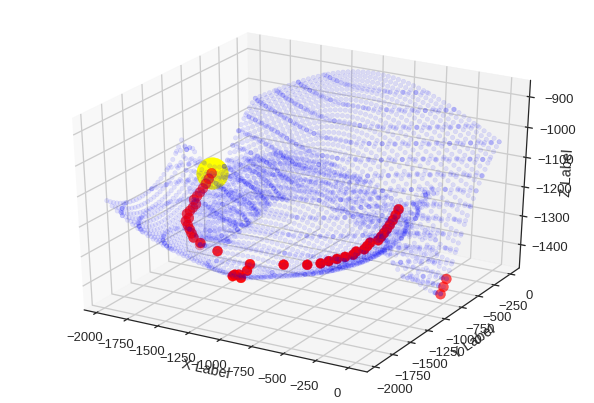

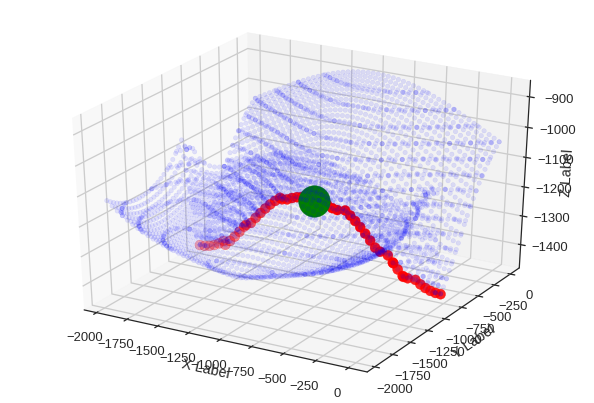

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


VOLUME INCLUDING OUTSIDE TRAP: 21952000.0
TRAP FOUND 16


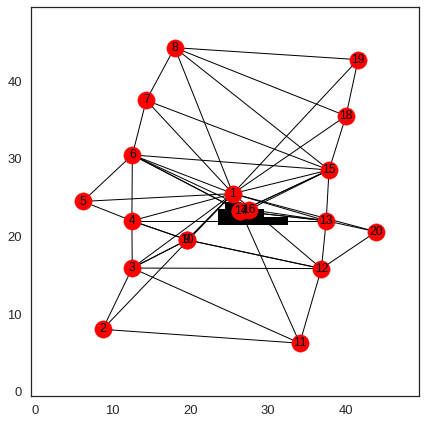

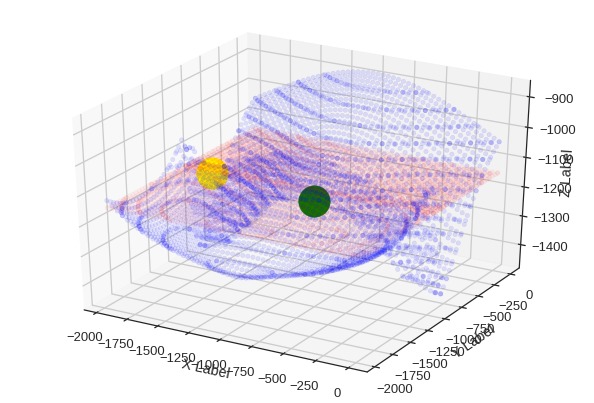

Bottom_Z: -1144.24369812
Maximum reservoir volume: 19776000.0 m³


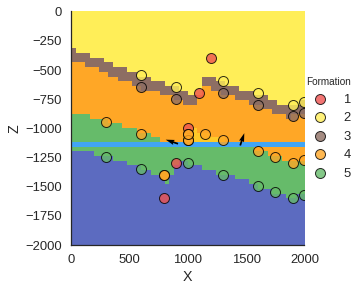

In [94]:
@pymc.deterministic
def gempy_model(value=0, z_res_top = z_res_top):

    new_z = res_z + z_res_top
    print('variation:', z_res_top)
    #print('new', new_z)
    #print(res_z)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = new_z
    #print(interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'])
    
    sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
    #gp.plot_section(geo_data, sol[0,:], 25)
    
    res_surf, res_surf_simp = gp.get_surfaces(potential_block=sol[0, 1,:], 
                                          interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']),)
    
    #print(sol[1,:])
    lith_block = sol[0, 0,:]
    fault_block = sol[0, 2,:]
    
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surf)
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surf)
    
    print('Spill_Z:', spill_z)
    print('Leak_Z:', leak_z)
    
    plot_spill(res_surf, spill_line, spill_p)
    plot_leak(res_surf, leak_line, leak_p)
            
    max_vol, sol[0, 0,:], bottom = max_res_vol(lith_block, fault_block, res_surf)
    
    #print(np.unique(sol[0, 0,:]))
    #topo_analysis(sol[0, 0,:], fault_block)
    
    plot_trap(res_surf, bottom, spill_p, leak_p)
    print("Bottom_Z:", bottom[1,2])
    
    print("Maximum reservoir volume: %s m³" % max_vol)
    gp.plot_section(geo_data, sol[0, 0,:], 25, plot_data=1)
    return sol

In [95]:
iterations = 5

In [96]:
model = pymc.Model([gempy_model, z_res_top])

variation: -8.246932647924327e-05


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Spill_Z: -1046.65031433
Leak_Z: -1003.22669983


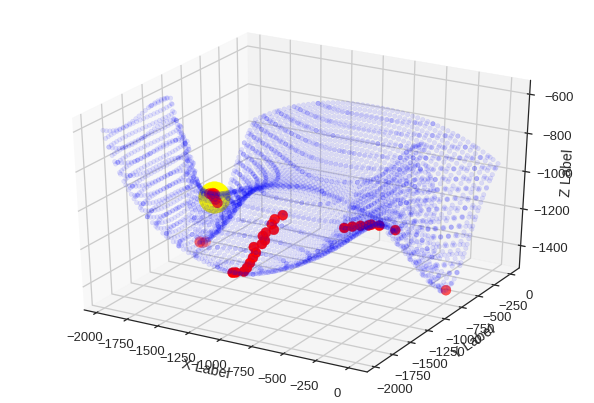

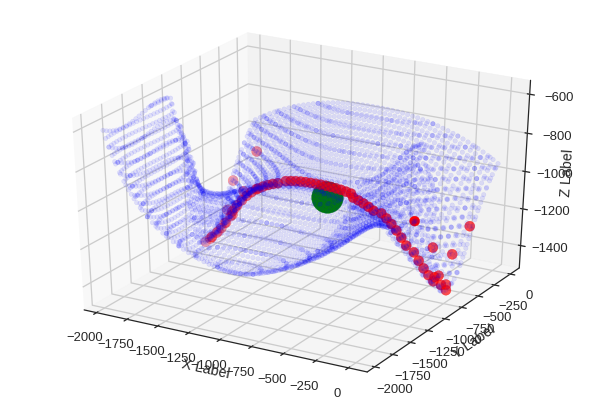

Down to leak.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:159: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


VOLUME INCLUDING OUTSIDE TRAP: 102720000.0
TRAP FOUND 21


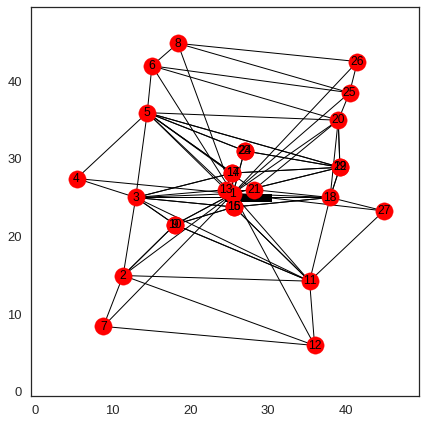

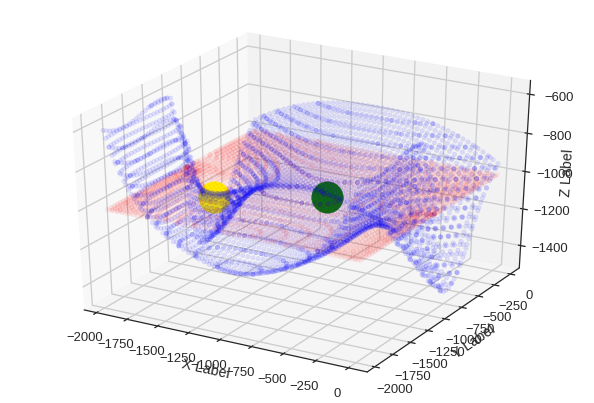

Bottom_Z: -1003.22669983
Maximum reservoir volume: 4736000.0 m³
 [---------------  40%                  ] 2 of 5 complete in 27.3 secvariation: 0.020619004198451325
Spill_Z: -884.814071655
Leak_Z: -993.618774414


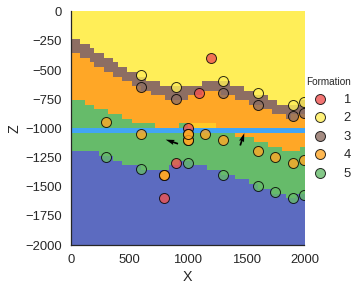

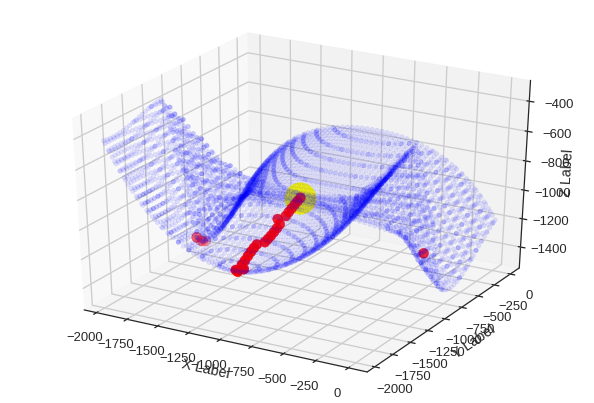

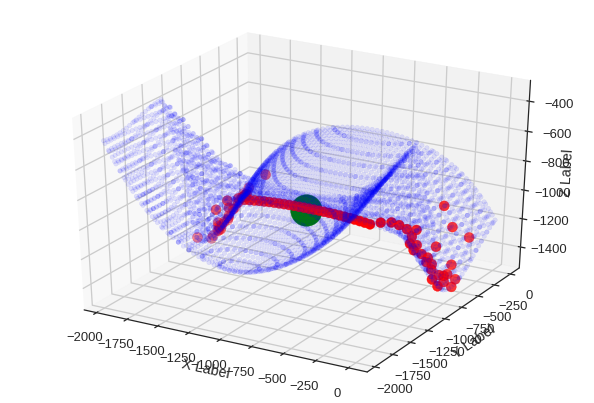

Down to spill.
VOLUME INCLUDING OUTSIDE TRAP: 221632000.0
No trap found! =(


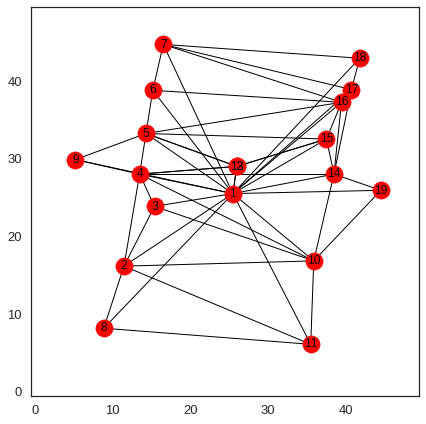

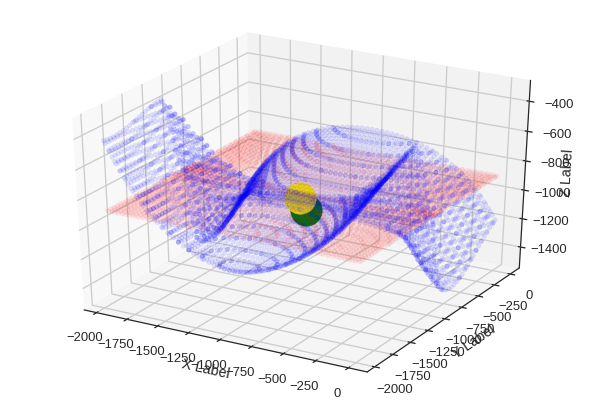

Bottom_Z: -884.814071655
Maximum reservoir volume: 0.0 m³
 [-----------------60%--                ] 3 of 5 complete in 57.7 secvariation: 0.0008280116278699976
Spill_Z: -1042.53196716
Leak_Z: -1000.0


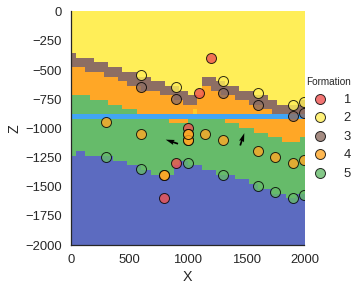

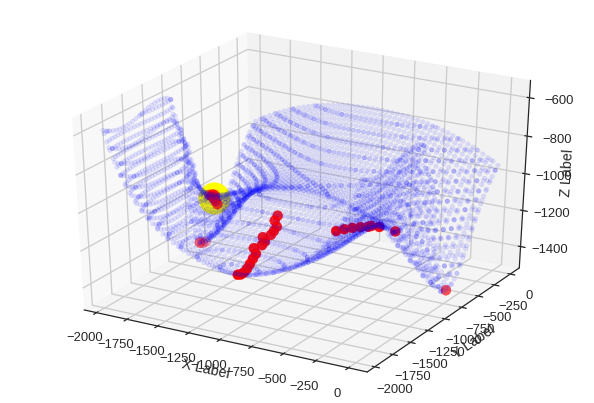

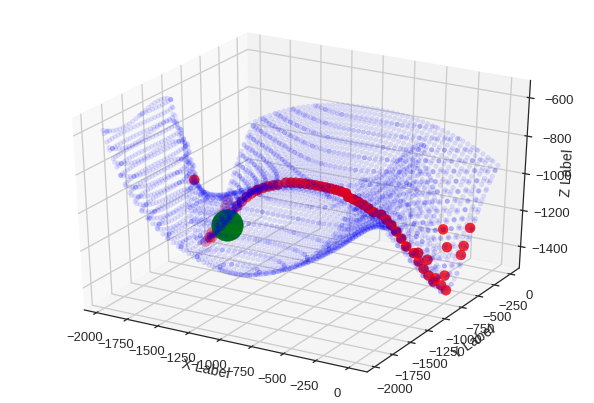

Down to leak.
VOLUME INCLUDING OUTSIDE TRAP: 107904000.0
TRAP FOUND 21


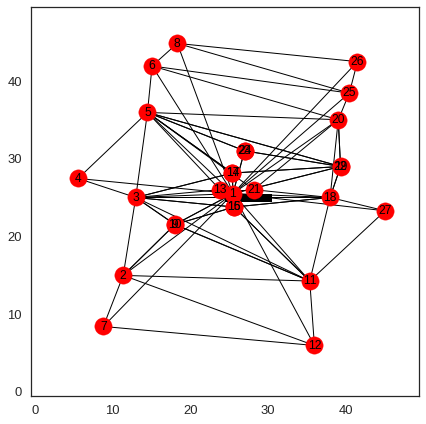

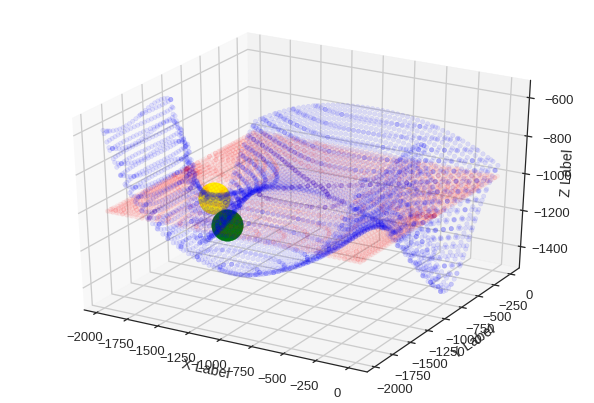

Bottom_Z: -1000.0
Maximum reservoir volume: 5248000.0 m³
 [-----------------80%----------        ] 4 of 5 complete in 85.5 secvariation: 0.02288221974580238
Spill_Z: -875.996780396
Leak_Z: -920.0


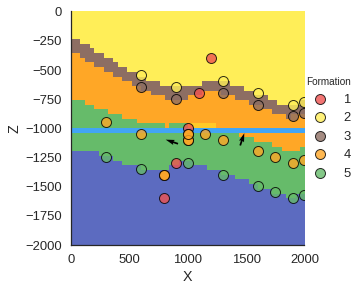

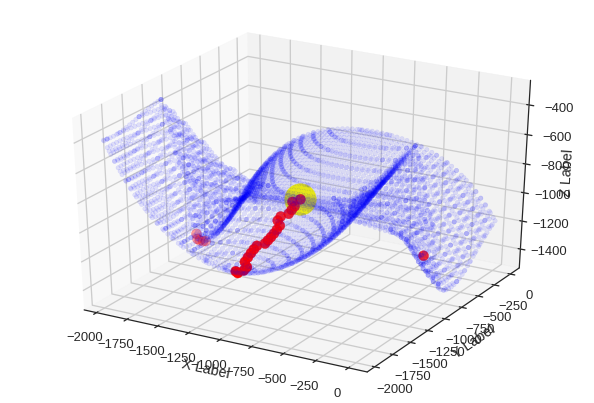

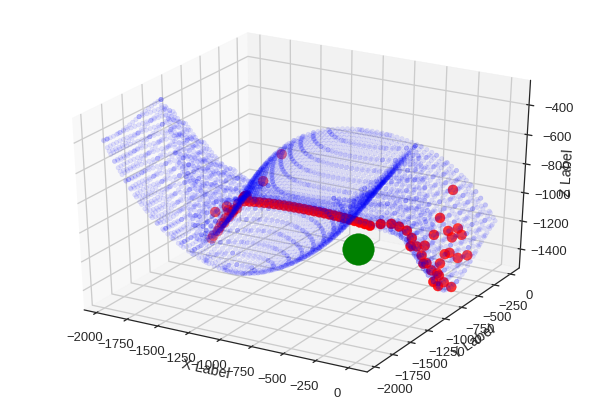

Down to spill.
VOLUME INCLUDING OUTSIDE TRAP: 194880000.0
No trap found! =(


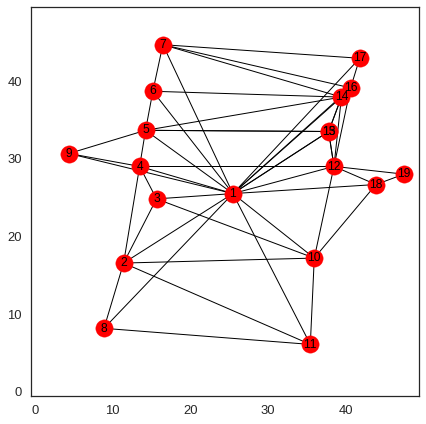

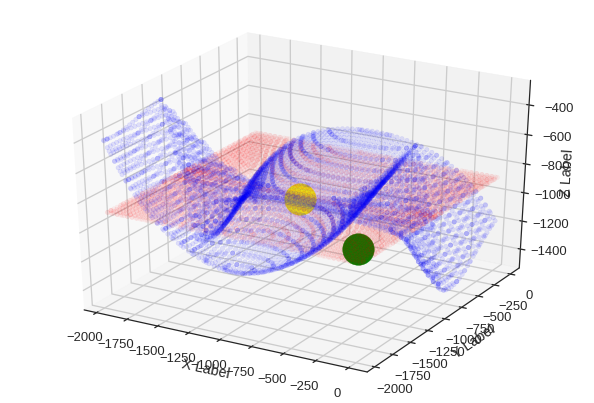

Bottom_Z: -875.996780396
Maximum reservoir volume: 0.0 m³
 [-----------------100%-----------------] 5 of 5 complete in 114.7 secvariation: 0.019423559262121835
Spill_Z: -889.400482178
Leak_Z: -960.0


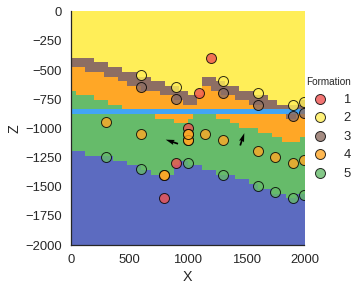

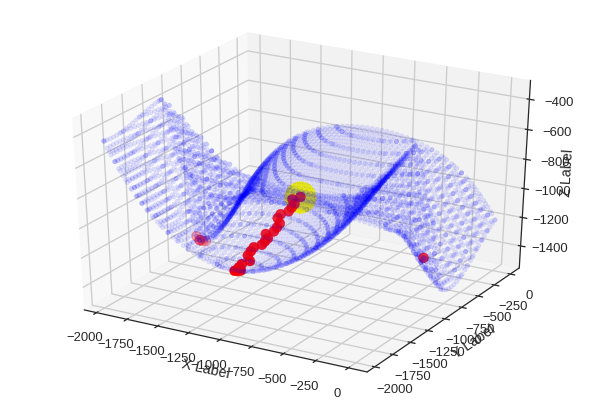

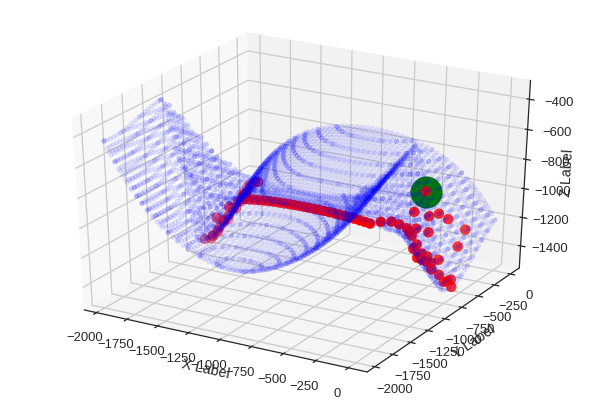

Down to spill.
VOLUME INCLUDING OUTSIDE TRAP: 212160000.0
No trap found! =(


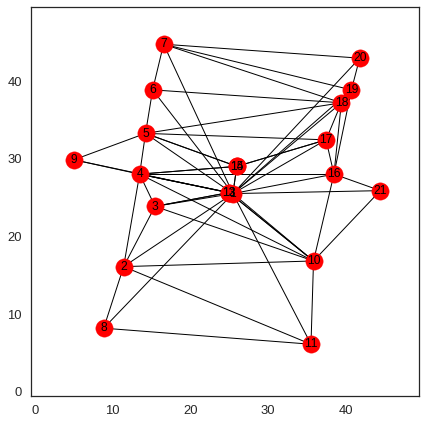

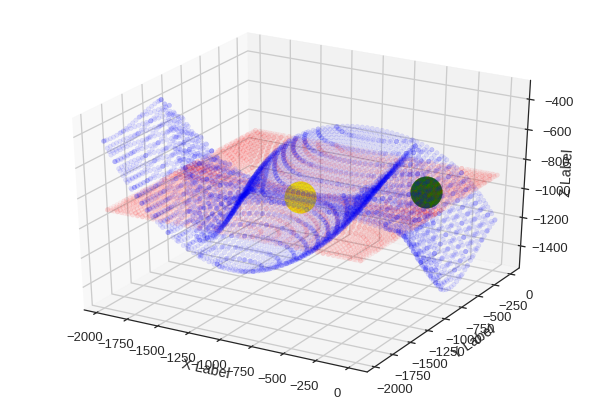

Bottom_Z: -889.400482178
Maximum reservoir volume: 0.0 m³
 [--------------------120%---------------------] 6 of 5 complete in 144.6 sec

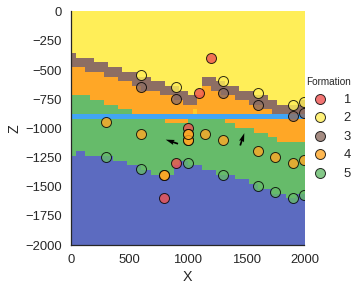

In [97]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

-8.24693264792e-05


ValueError: total size of new array must be unchanged

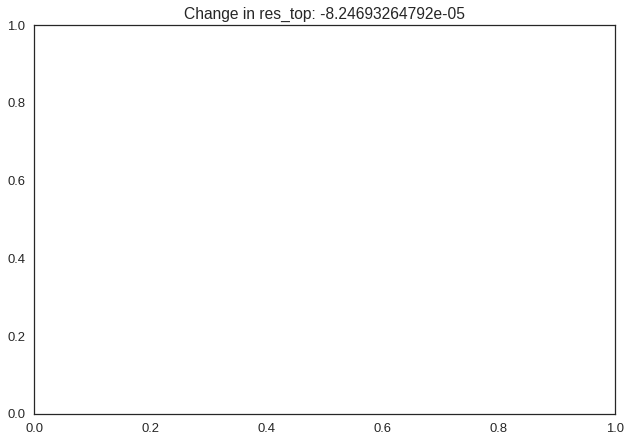

In [98]:
bla = M.trace('z_unc_res')[:]
bli = M.trace('gempy_model')[:]
bla.shape

for j in range(iterations):
    plt.figure()
    plt.title('Change in res_top: %s' % bla[j])
    print(bla[j])
    gp.plot_section(geo_data, bli[j,0], 20)

In [66]:
interp_data.geo_data_res.interfaces

X         Y         Z           formation series  order_series  \
0   0.461638    0.5001    0.5001           MainFault  fault             1   
1   0.410356    0.5001  0.346254           MainFault  fault             1   
2   0.512921    0.5001  0.653946           MainFault  fault             1   
3   0.487279    0.5001  0.577023           MainFault  fault             1   
4   0.435997    0.5001  0.423177           MainFault  fault             1   
5   0.282151    0.5001  0.435997    NonReservoirDeep   Rest             2   
6   0.718049    0.5001  0.352664    NonReservoirDeep   Rest             2   
7   0.538562    0.5001  0.397536    NonReservoirDeep   Rest             2   
8   0.615485    0.5001  0.371895    NonReservoirDeep   Rest             2   
9   0.653946    0.5001  0.359074    NonReservoirDeep   Rest             2   
10  0.461638    0.5001  0.423177    NonReservoirDeep   Rest             2   
11  0.359074    0.5001  0.410356    NonReservoirDeep   Rest             2   
12  0.692408    0.5001  0.346254    NonReservoirDeep   Rest             2   
13  0.410356  0.294972  0.470043           Reservoir   Rest             2   
14  0.410356  0.705228  0.470043           Reservoir   Rest             2   
15  0.359074    0.5001  0.559786           Reservoir   Rest             2   
16  0.282151    0.5001  0.585427           Reservoir   Rest             2   
17  0.718049    0.5001  0.502094           Reservoir   Rest             2   
18  0.692408    0.5001  0.495684           Reservoir   Rest             2   
19  0.538562    0.5001  0.546966           Reservoir   Rest             2   
20  0.615485    0.5001  0.521325           Reservoir   Rest             2   
21  0.653946    0.5001  0.508504           Reservoir   Rest             2   
22  0.461638  0.269331  0.546966           Reservoir   Rest             2   
23  0.461638    0.7501  0.559786           Reservoir   Rest             2   
24  0.461638  0.730869  0.546966           Reservoir   Rest             2   
25    0.5001    0.5001  0.559786           Reservoir   Rest             2   
26  0.461638    0.2501  0.559786           Reservoir   Rest             2   
27  0.435997    0.5001  0.564203                Seal   Rest             2   
28  0.692408    0.5001  0.525741                Seal   Rest             2   
29  0.718049    0.5001  0.532151                Seal   Rest             2   
30  0.359074    0.5001  0.589844                Seal   Rest             2   
31  0.538562    0.5001  0.577023                Seal   Rest             2   
32  0.615485    0.5001  0.551382                Seal   Rest             2   
33  0.718049    0.5001  0.557792  SecondaryReservoir   Rest             2   
34  0.615485    0.5001  0.577023  SecondaryReservoir   Rest             2   
35  0.692408    0.5001  0.551382  SecondaryReservoir   Rest             2   
36  0.435997    0.5001  0.589844  SecondaryReservoir   Rest             2   
37  0.359074    0.5001  0.615485  SecondaryReservoir   Rest             2   
38  0.538562    0.5001  0.602664  SecondaryReservoir   Rest             2   

    formation number  isFault X_std Y_std Z_std dist_type X_dist Y_dist Z_dist  
0                  1     True   NaN   NaN   NaN    Normal   None   None   None  
1                  1     True   NaN   NaN   NaN    Normal   None   None   None  
2                  1     True   NaN   NaN   NaN    Normal   None   None   None  
3                  1     True   NaN   NaN   NaN    Normal   None   None   None  
4                  1     True   NaN   NaN   NaN    Normal   None   None   None  
5                  2    False   NaN   NaN   NaN    Normal   None   None   None  
6                  2    False   NaN   NaN   NaN    Normal   None   None   None  
7                  2    False   NaN   NaN   NaN    Normal   None   None   None  
8                  2    False   NaN   NaN   NaN    Normal   None   None   None  
9                  2    False   NaN   NaN   NaN    Normal   None   None   None  
10                 2    False   NaN   N

Z-Variations: 0.006337090575083097

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWa

 0.03700743930740647 -0.007837442603454323 0.061932848760904984
Spill_Z: -1184.24453735
Leak_Z: -1210.29983521


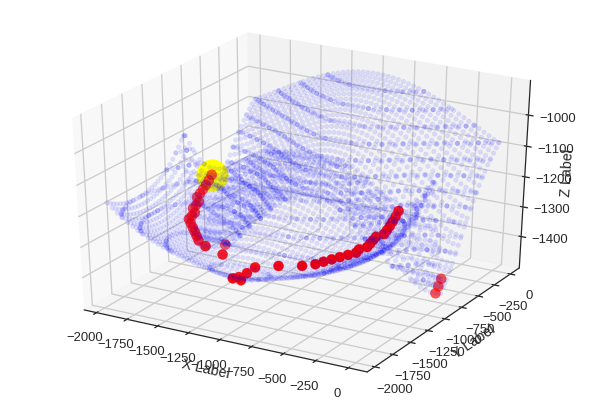

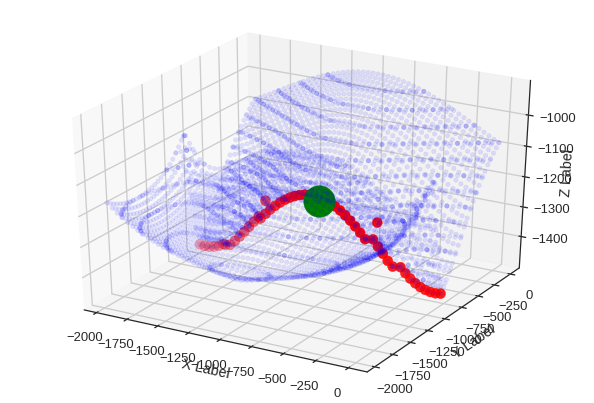

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


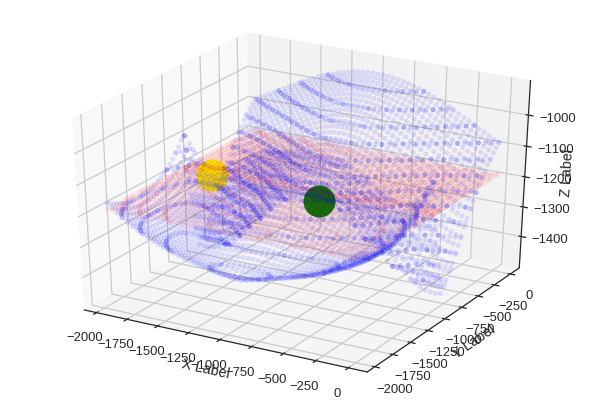

Bottom_Z: -1184.24453735
Maximum reservoir volume: 12160000.0 m³


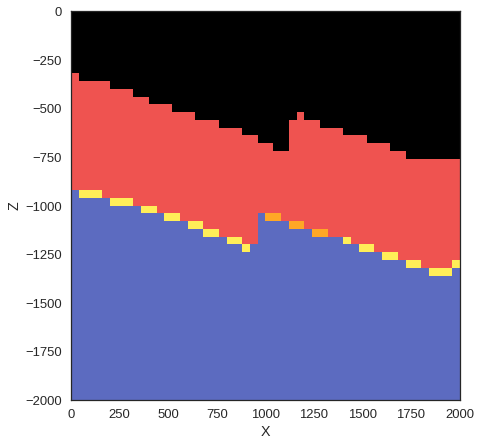

In [23]:
  
@pymc.deterministic
def model_unc_all(value=0, z_sec_res_top = z_sec_res_top, 
                  z_res_top = z_res_top, z_seal_top = z_seal_top, z_base_top = z_base_top):
    
    new_z_sec_res = sec_res_z + z_sec_res_top
    new_z_seal = seal_z + z_seal_top
    new_z_res = res_z + z_res_top
    new_z_base = base_z + z_base_top
    
    print('Z-Variations:', z_sec_res_top, z_seal_top, z_res_top, z_base_top)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'] = new_z_sec_res
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Seal'] = new_z_seal
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = new_z_res
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'NonReservoirDeep'] = new_z_base
   
    sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
    
    res_surf, what_surf = gp.get_surfaces(potential_block=sol[0, 1,:], 
                                          interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']),)
    
    #print(sol[1,:])
    lith_block = sol[0, 0,:]
    fault_block = sol[0, 2,:]
    
    spill_z, spill_p, spill_line, spill_bottom = spill_point(res_surf)
    leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surf)
    
    print('Spill_Z:', spill_z)
    print('Leak_Z:', leak_z)
    
    plot_spill(res_surf, spill_line, spill_p)
    plot_leak(res_surf, leak_line, leak_p)
            
    max_vol, sol[0, 0,:], bottom = max_res_vol(lith_block, fault_block, res_surf)
    
    plot_trap(res_surf, bottom, spill_p, leak_p)
    print("Bottom_Z:", bottom[1,2])
    
    print("Maximum reservoir volume: %s m³" % max_vol)
    gp.plot_section(geo_data, sol[0, 0,:], 25)
    return sol

In [24]:
iterations = 5
model2 = pymc.Model([model_unc_all, z_sec_res_top, z_seal_top, z_res_top, z_base_top])

Z-Variations: 

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWa

-2.574720944564407e-05 -0.01472609044293142 0.04064745210537701 -0.019112350353771634
Spill_Z: -899.660797119
Leak_Z: -1000.0


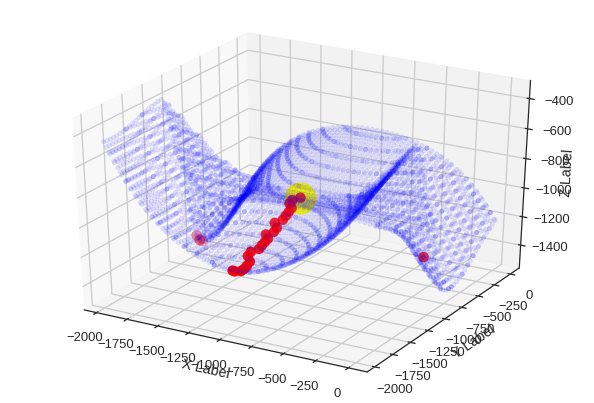

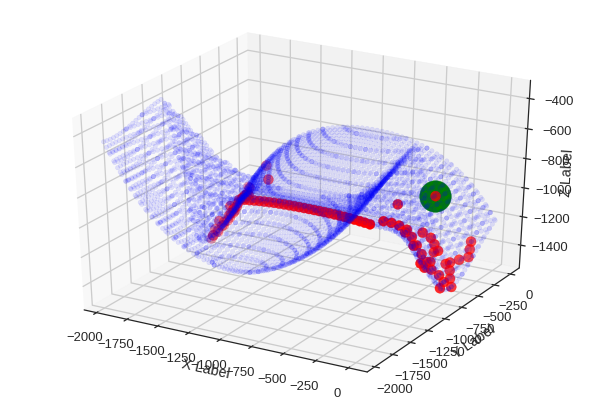

Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


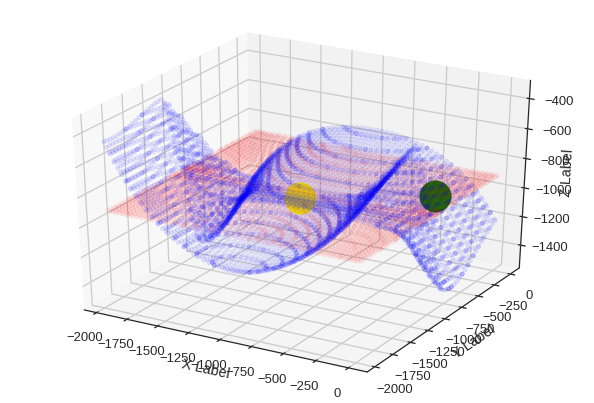

Bottom_Z: -899.660797119
Maximum reservoir volume: 203264000.0 m³
 [---------------  40%                  ] 2 of 5 complete in 31.7 secZ-Variations: -0.011788102251511248 -0.02086654095177432 0.04065036991269086 -0.1446779744669788
Spill_Z: -901.184158325
Leak_Z: -1000.0


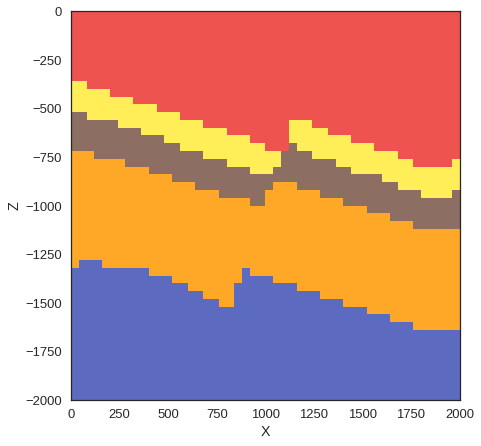

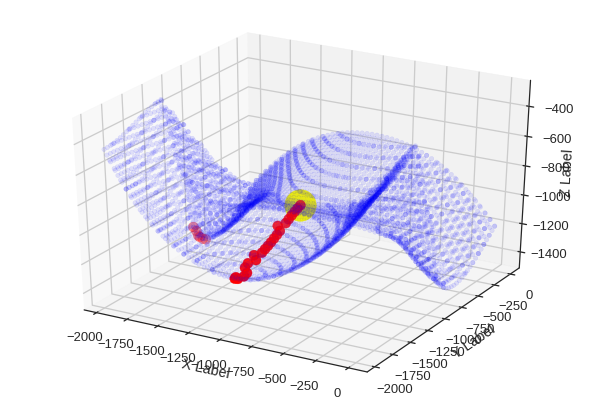

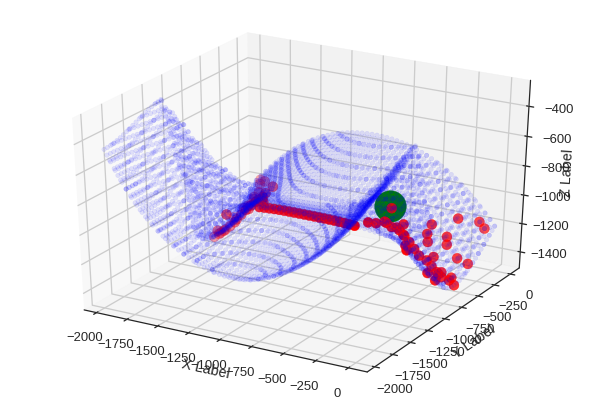

Down to spill.


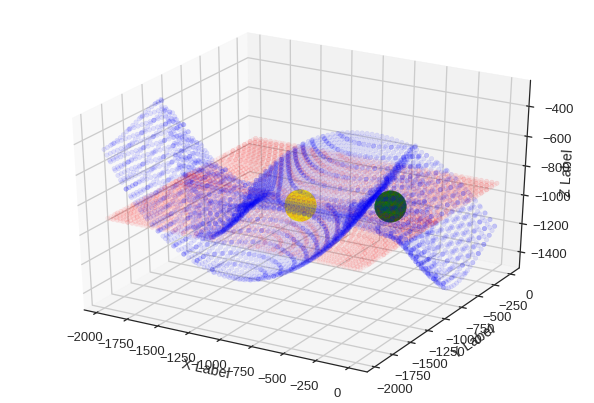

Bottom_Z: -901.184158325
Maximum reservoir volume: 212672000.0 m³
 [-----------------60%--                ] 3 of 5 complete in 63.7 secZ-Variations: -0.008465844314634744 0.008050085560785335 0.01884935383880439 -0.34902968844129156
Spill_Z: -1025.08735657
Leak_Z: -1016.59828186


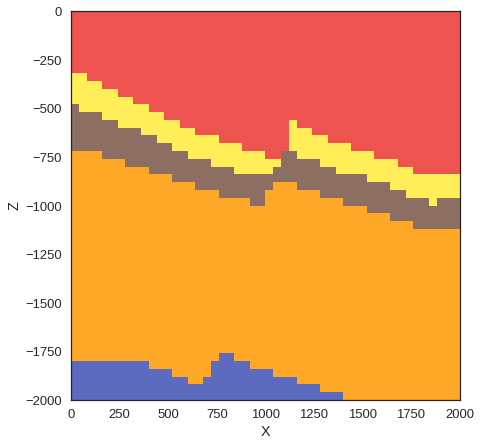

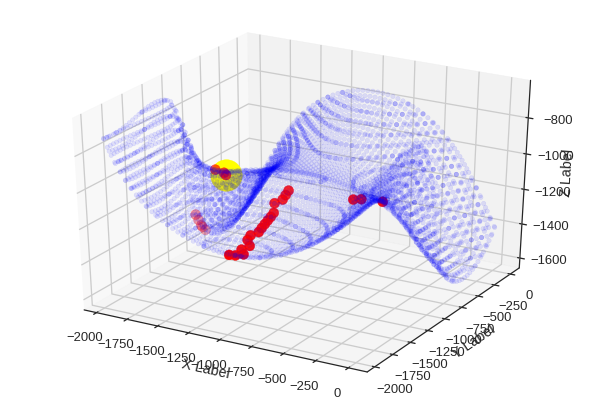

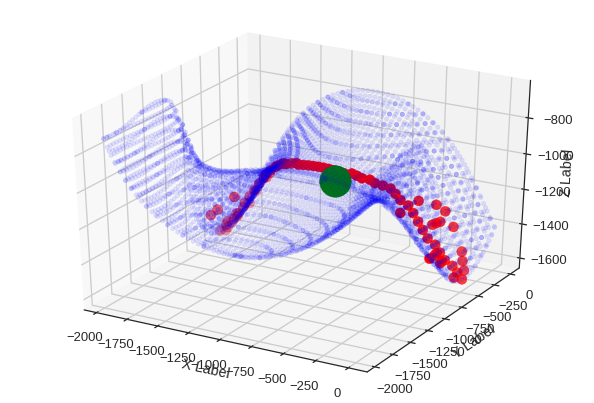

Down to leak.


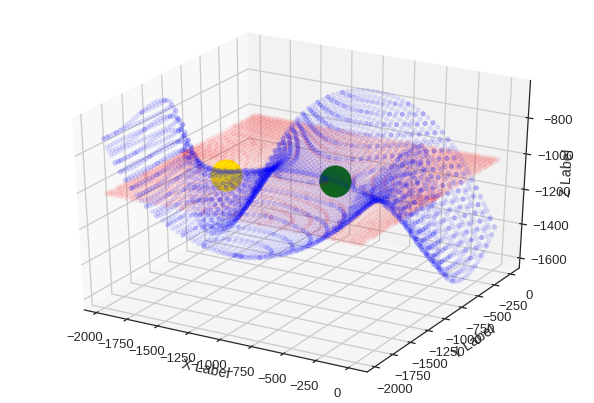

Bottom_Z: -1016.59828186
Maximum reservoir volume: 84800000.0 m³
 [-----------------80%----------        ] 4 of 5 complete in 93.8 secZ-Variations: 0.0030932264125547167

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.253069092932435e-09
  ' condition number: {}'.format(rcond), RuntimeWarning)


 0.029163984740163833 -0.013994069521083187 -0.23774818161930453
Spill_Z: -1202.74917603
Leak_Z: -1189.96482849


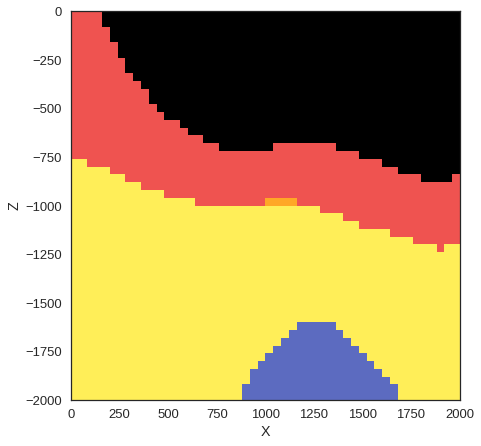

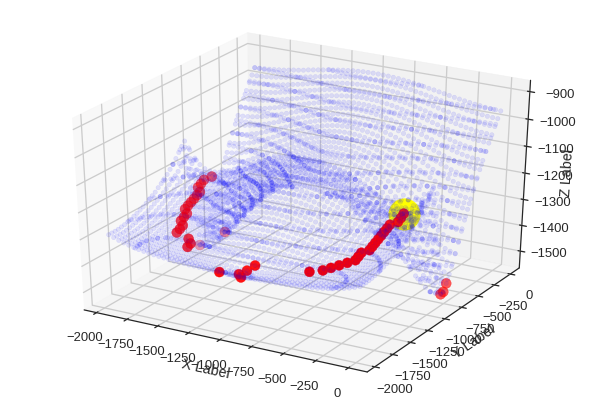

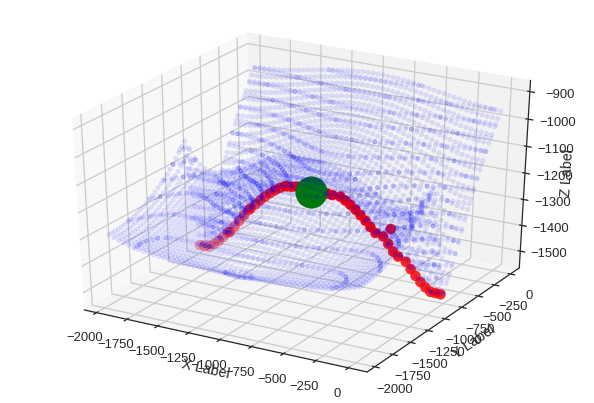

Down to leak.


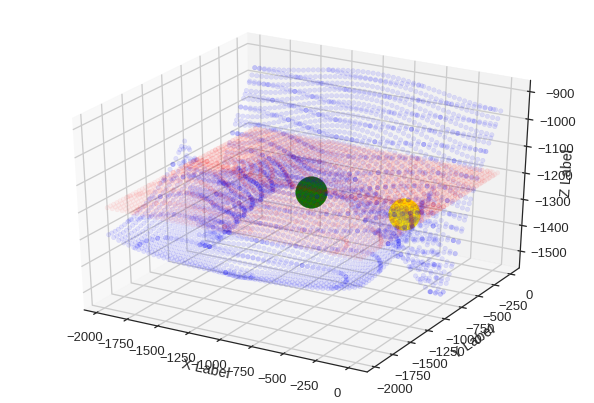

Bottom_Z: -1189.96482849
Maximum reservoir volume: 14656000.0 m³
 [-----------------100%-----------------] 5 of 5 complete in 119.0 secZ-Variations: 0.0043380154273279636 0.01060721466235554 -0.02020585363791179 0.14610128317188145
Spill_Z: -1194.53514099
Leak_Z: -1169.62272644


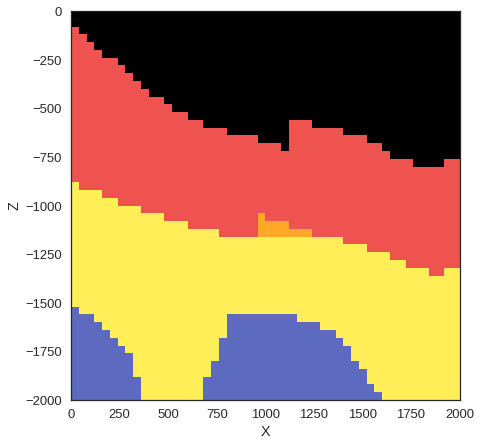

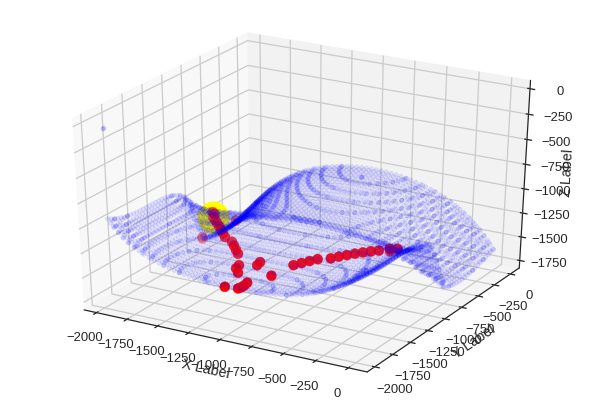

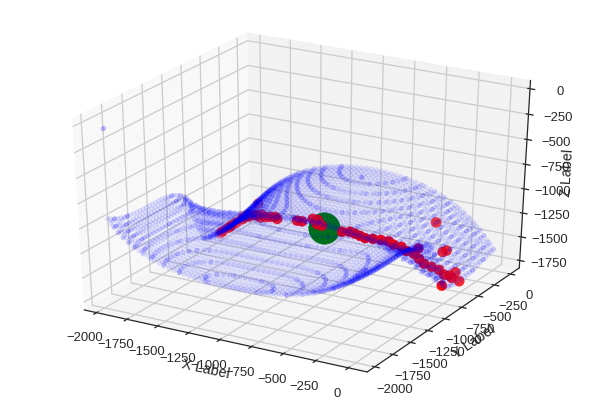

Down to leak.


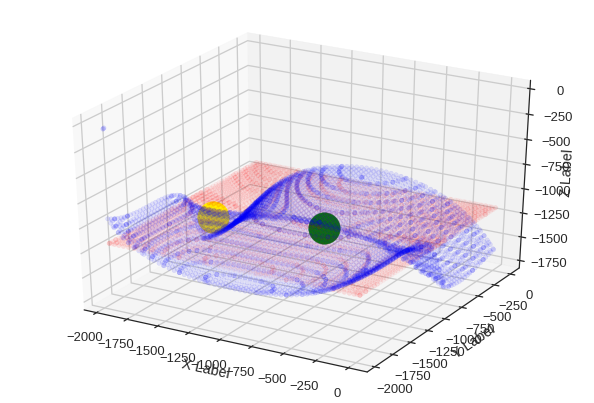

Bottom_Z: -1169.62272644
Maximum reservoir volume: 1818176000.0 m³
 [--------------------120%---------------------] 6 of 5 complete in 147.0 sec

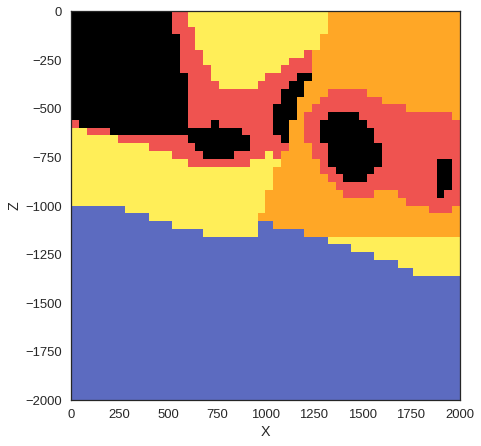

In [25]:
M2 = pymc.MCMC(model2)
M2.sample(iter=iterations)

In [72]:
sec_res_unc_trace = M2.trace('z_unc_sec_res')[:]
seal_unc_trace = M2.trace('z_unc_seal')[:]
res_unc_trace = M2.trace('z_unc_res')[:]
base_base_trace = M2.trace('z_unc_base')[:]
model2_trace = M2.trace('model_unc_all')[:]

for j in range(iterations):
    plt.figure()
    #plt.title('Change in res_top: %s' % bla[j])
    #print(bla[j])
    gp.plot_section(geo_data, model2_trace[j,0], 20)

ValueError: total size of new array must be unchanged

In [ ]:
max_z = -1112
sol[0,0,:] = set_spill_to_seal(geo_data, sol[0,0,:], max_z)

lith_spill = np.argmin(np.abs(geo_data.grid.grid[:, 2]+np.abs(max_z)))
bol_lith_spill = geo_data.grid.grid[:, 2] == geo_data.grid.grid[:, 2][lith_spill]
lith[bol_lith_spill] = 4


In [4]:
geo_data.grid?